<a href="https://colab.research.google.com/github/ashimala/Week3-AI-Assignment/blob/main/Week3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 - Classification with Scikit-learn

This notebook demonstrates:
- Loading the Iris dataset
- EDA, train/test split
- Pipeline (StandardScaler + RandomForest)
- Evaluation: accuracy, confusion matrix, classification report
- Saving figures and model for the report


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import joblib
import os


In [ ]:
os.makedirs("../figures", exist_ok=True)  # adjust path if saving in repo root
os.makedirs("../models", exist_ok=True)

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
display(df.head())
print("Class counts:\n", df['target'].value_counts())


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Class counts:
 target
0    50
1    50
2    50
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



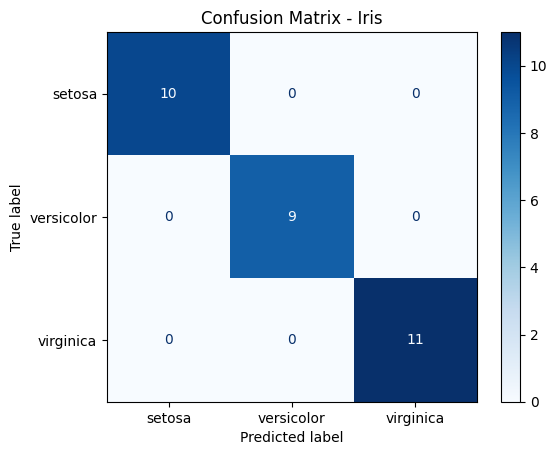

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Iris")
plt.savefig("../figures/sklearn_confusion_matrix.png", dpi=150)
plt.show()

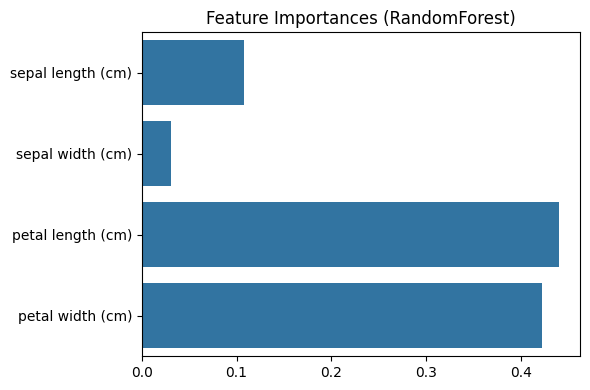

Saved model to ../models/iris_randomforest.pkl


In [ ]:
model = pipeline.named_steps['model']
importances = model.feature_importances_
features = iris.feature_names

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances (RandomForest)")
plt.tight_layout()
plt.savefig("../figures/sklearn_feature_importance.png", dpi=150)
plt.show()

joblib.dump(pipeline, "../models/iris_randomforest.pkl")
print("Saved model to ../models/iris_randomforest.pkl")


# 02 - CNN with TensorFlow (Fashion-MNIST)

This notebook builds a small CNN with Keras, plots training curves, and saves the model.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs("../figures", exist_ok=True)
os.makedirs("../models", exist_ok=True)
print("TF version:", tf.__version__)


TF version: 2.19.0


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
# normalize and add channel
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]
print("Shapes:", x_train.shape, x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Shapes: (60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.7259 - loss: 0.7537 - val_accuracy: 0.8609 - val_loss: 0.3872
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8610 - loss: 0.3817 - val_accuracy: 0.8748 - val_loss: 0.3348
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.8829 - loss: 0.3212 - val_accuracy: 0.8923 - val_loss: 0.3005
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8941 - loss: 0.2867 - val_accuracy: 0.8981 - val_loss: 0.2800
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.9047 - loss: 0.2610 - val_accuracy: 0.9031 - val_loss: 0.2703
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.9092 - loss: 0.2421 - val_accuracy: 0.9078 - val_loss: 0.2479
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9131 - loss: 0.2284 - val_accuracy: 0.8971 - val_loss: 0.2766
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.9205 - loss: 0.2145 - 

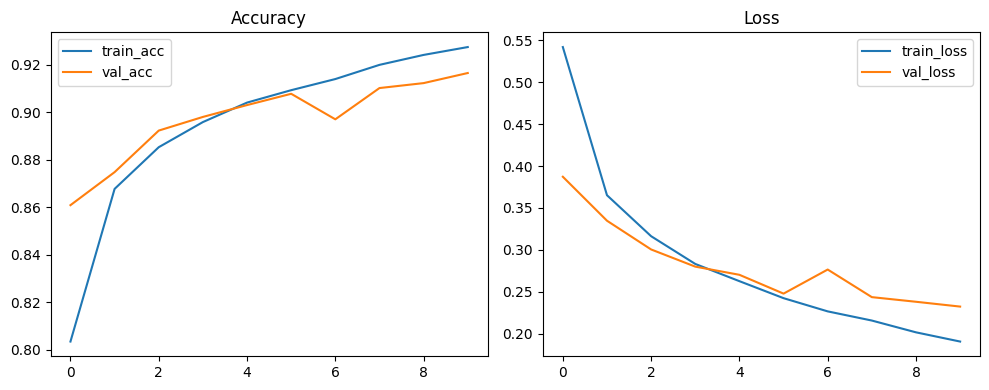

Saved model to ../models/fashion_mnist_cnn.h5


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

# plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.savefig("../figures/tf_training_plot.png", dpi=150)
plt.show()

model.save("../models/fashion_mnist_cnn.h5")
print("Saved model to ../models/fashion_mnist_cnn.h5")


**Notes:**
- To reduce overfitting: Dropout (already used), Data Augmentation, EarlyStopping.

# 03 - Transfer Learning with PyTorch (ResNet18 + CIFAR-10 subset)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

os.makedirs("../figures", exist_ok=True)
os.makedirs("../models", exist_ok=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on:", device)


Running on: cpu


In [ ]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='../data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='../data', train=False, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)
classes = trainset.classes
print("Classes:", classes)


100%|██████████| 170M/170M [15:07<00:00, 188kB/s]


Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
resnet = models.resnet18(pretrained=True)
for param in resnet.parameters():
    param.requires_grad = False

num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 10)
resnet = resnet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.fc.parameters(), lr=0.001)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 109MB/s]


In [ ]:
resnet.train()
epochs = 3
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in tqdm(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs} - loss: {running_loss/len(trainloader):.4f}")
print("Training done")


100%|██████████| 782/782 [1:21:34<00:00,  6.26s/it]


Epoch 1/3 - loss: 0.8350


100%|██████████| 782/782 [1:21:46<00:00,  6.27s/it]


Epoch 2/3 - loss: 0.6160


100%|██████████| 782/782 [1:21:15<00:00,  6.24s/it]

Epoch 3/3 - loss: 0.5880
Training done


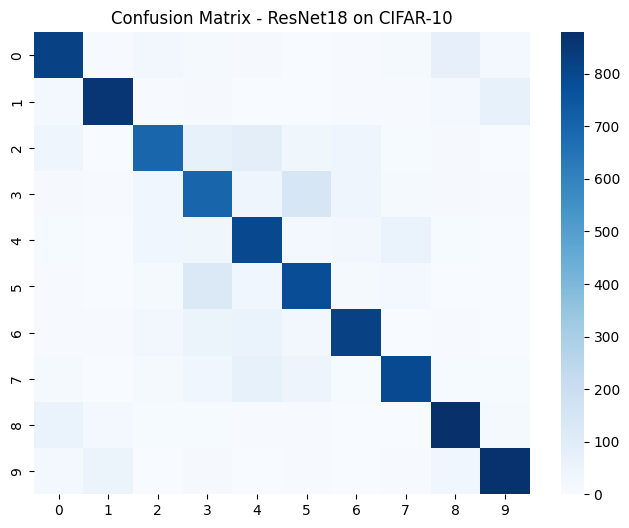

Saved PyTorch model.


In [ ]:
resnet.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues')
plt.title("Confusion Matrix - ResNet18 on CIFAR-10")
plt.savefig("../figures/pytorch_confusion_matrix.png", dpi=150)
plt.show()

torch.save(resnet.state_dict(), "../models/resnet18_cifar10.pth")
print("Saved PyTorch model.")

# 04 - NER with spaCy (pre-trained + small custom training)

In [1]:
!pip install spacy

In [2]:
import spacy
from spacy import displacy
from pathlib import Path
import os
os.makedirs("../models", exist_ok=True)
os.makedirs("../figures", exist_ok=True)


In [3]:
nlp = spacy.load("en_core_web_sm")
text = "Apple is looking at buying U.K. startup for $1 billion. Elon Musk visited Nigeria in 2024."
doc = nlp(text)
for ent in doc.ents:
    print(ent.text, ent.label_)
displacy.render(doc, style="ent", jupyter=True)


Apple ORG
U.K. GPE
$1 billion MONEY
Elon Musk PERSON
Nigeria GPE
2024 DATE


In [6]:
import random
import spacy
from spacy.training import Example

TRAIN_DATA = [
    ("She was prescribed Amoxicillin for her infection.", {"entities": [(20, 31, "MEDICATION")]}),
    ("Take two tablets of Paracetamol daily.", {"entities": [(19, 30, "MEDICATION")]}),
    ("Ibuprofen should not be mixed with alcohol.", {"entities": [(0, 9, "MEDICATION")]}),
]

# Start with blank English model
nlp = spacy.blank("en")

# Create NER pipeline
ner = nlp.add_pipe("ner")

# Add the MEDICATION label
ner.add_label("MEDICATION")

# Begin training
optimizer = nlp.begin_training()

for i in range(20):
    random.shuffle(TRAIN_DATA)
    losses = {}

    for text, annotations in TRAIN_DATA:
        # Create Example object
        example = Example.from_dict(nlp.make_doc(text), annotations)
        nlp.update([example], sgd=optimizer, losses=losses)

    if i % 5 == 0:
        print("Iteration", i, "losses", losses)

print("Training completed!")

# Test the model
test_text = "Patient needs Paracetamol for pain relief"
doc = nlp(test_text)
print("\nTest results:")
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")

/usr/local/lib/python3.12/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Take two tablets of Paracetamol daily." with entities "[(19, 30, 'MEDICATION')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "She was prescribed Amoxicillin for her infection." with entities "[(20, 31, 'MEDICATION')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


Iteration 0 losses {'ner': np.float32(16.913445)}
Iteration 5 losses {'ner': np.float32(0.6207955)}
Iteration 10 losses {'ner': np.float32(0.00018948546)}
Iteration 15 losses {'ner': np.float32(3.2877964e-10)}
Training completed!

Test results:


In [7]:
doc = nlp("He took Ibuprofen after dinner.")
for ent in doc.ents:
    print(ent.text, ent.label_)
# save model
output_dir = Path("../models/custom_ner_model")
nlp.to_disk(output_dir)
print("Saved custom NER model to", output_dir)


Saved custom NER model to ../models/custom_ner_model
